<a href="https://colab.research.google.com/github/Grazipolachini/CursoDataScience/blob/main/ModeloTreinamentoClienteInvestidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#montando o drive no colab
from google.colab import drive
drive.mount('/content/drive')

#Atribui o caminho do csv a uma variável
csv_path = '/content/drive/MyDrive/clientes_investidores_500000.csv'

#importa o arquivo para a biblioteca pandas
import pandas as pd

df = pd.read_csv(csv_path)
print(df.shape)
df.head(20)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(500000, 25)


,ID,CPF,NOME,SEXO,UF,CIDADE,idade,Data de nascimento,valor da Renda,Classe social,...,Valor Resgate investimento,Valor Posição investimento,Data primeiro aporte,Data último resgate,Quantidade de papéis contratados,Tipo perfil investidor,Suitability,Data de cadastro suitability,Classificação do perfil do investidor,Limite de Crédito
0,1,321.564.087-26,Arthur Borges,Masculino,MG,Belo Horizonte,58,1967-04-29,18973.71,D,...,396.91,4691.84,2021-03-11,2021-04-18,4,Conservador,Alto,2023-04-07,NaN,17926.04
1,2,386.194.205-42,Sra. Manuela da Mota,Masculino,BA,Feira de Santana,65,1959-09-21,10352.97,B,...,4820.04,17497.79,2017-05-28,2021-06-19,4,Conservador,Baixo,2022-07-09,Gold,12122.45
2,3,169.284.507-11,Camila Garcia,Masculino,BA,Salvador,50,1974-08-19,26725.19,B,...,625.34,26299.80,2016-11-02,2025-01-26,3,Arrojado,Médio,2023-06-13,NaN,16613.36
3,4,531.097.268-40,Mateus da Mota,Masculino,RS,Caxias do Sul,69,1956-06-24,10194.89,D,...,966.73,2937.84,2016-02-24,2018-11-15,3,Moderado,Baixo,2024-04-28,Silver,15624.59
4,5,534.960.127-06,Ravi Garcia,Masculino,MG,Uberlândia,23,2001-12-04,16670.91,C,...,40610.84,64173.37,2019-07-09,2024-06-16,6,Moderado,Alto,2022-12-05,NaN,-9395.05


In [ ]:
# prompt: contem a quantidade de linhas com tipo de investidor nulo

print(df['Classificação do perfil do investidor'].isnull().sum())


332103


In [ ]:
# prompt: quantidade de linhas por Classificação do perfil do investidor

print(df['Classificação do perfil do investidor'].value_counts())

Classificação do perfil do investidor
Gold       118103
Silver      45930
Black        3790
Diamond        74
Name: count, dtype: int64


In [ ]:
# Importa bibliotecas que serão utilizadas no modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Filtra 25% da base para o treinamento
df = df[df["Classificação do perfil do investidor"].notnull()]

In [ ]:
print(df["Classificação do perfil do investidor"].notnull().sum())

167897


In [ ]:
print(df['Classificação do perfil do investidor'].notnull().value_counts())

Classificação do perfil do investidor
True    167897
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

,0
ID,0
CPF,0
NOME,0
SEXO,0
UF,0
CIDADE,0
idade,0
Data de nascimento,0
valor da Renda,0
Classe social,0


In [ ]:

#Seleciona variávei
Variaveis = [
    "idade", "valor da Renda", "Salario", "Valor Total investido Ativo",
    "Valor Resgate investimento", "Valor Posição investimento",
    "Quantidade de papéis contratados", "Suitability", "Limite de Crédito",
    "Classe social", "Estado civil", "Escolaridade", "profissão", "SEXO", "UF"]

print(Variaveis)
print(df.columns.tolist())

['idade', 'valor da Renda', 'Salario', 'Valor Total investido Ativo', 'Valor Resgate investimento', 'Valor Posição investimento', 'Quantidade de papéis contratados', 'Suitability', 'Limite de Crédito', 'Classe social', 'Estado civil', 'Escolaridade', 'profissão', 'SEXO', 'UF']
['ID', 'CPF', 'NOME', 'SEXO', 'UF', 'CIDADE', 'idade', 'Data de nascimento', 'valor da Renda', 'Classe social', 'Estado civil', 'Escolaridade', 'profissão', 'Salario', 'Valor Total investido Ativo', 'Valor Resgate investimento', 'Valor Posição investimento', 'Data primeiro aporte', 'Data último resgate', 'Quantidade de papéis contratados', 'Tipo perfil investidor', 'Suitability', 'Data de cadastro suitability', 'Classificação do perfil do investidor', 'Limite de Crédito']


In [ ]:
# 4. Separar X e y
X = df[Variaveis]
y = df["Classificação do perfil do investidor"]

# 5. Codificar variáveis categóricas
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, stratify=y, random_state=42
)

In [ ]:

print(y_test.value_counts())

Classificação do perfil do investidor
Gold       41336
Silver     16076
Black       1326
Diamond       26
Name: count, dtype: int64


In [ ]:
# 7. Treinar modelo
clf = RandomForestClassifier(n_estimators=1, random_state=42)
clf.fit(X_train, y_train)

# 8. Avaliar
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       Black       0.99      0.99      0.99      1326
     Diamond       1.00      0.96      0.98        26
        Gold       1.00      1.00      1.00     41336
      Silver       1.00      1.00      1.00     16076

    accuracy                           1.00     58764
   macro avg       1.00      0.99      0.99     58764
weighted avg       1.00      1.00      1.00     58764



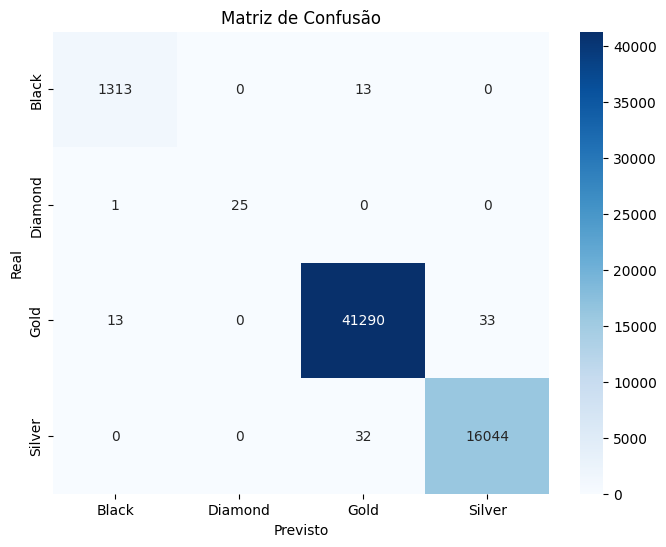

In [ ]:
# 9. Matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

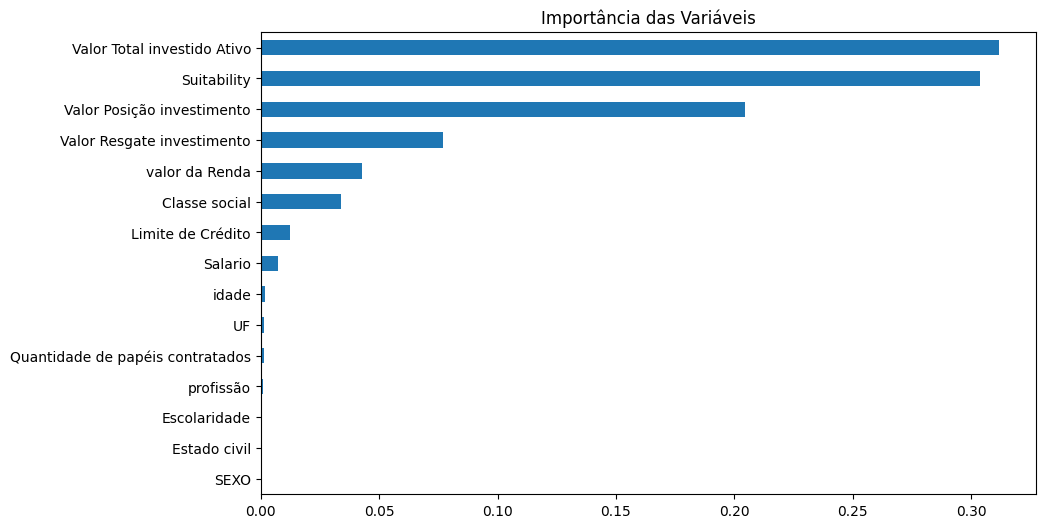

In [ ]:
# 10. Importância das variáveis
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6), title="Importância das Variáveis")
plt.show()